<a href="https://colab.research.google.com/github/juanmggb/maestria/blob/main/mc_fb_optimization/mc_fb_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyDOE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyDOE: filename=pyDOE-0.3.8-py3-none-any.whl size=18184 sha256=d5bc270e53595890085167507bc95258d6a16b2c86b3dd8774d61f240aedd975
  Stored in directory: /root/.cache/pip/wheels/00/3e/fa/5705bf59c2053c17c4799c3ab66a2e356c32f40a3044fe2134
Successfully built pyDOE


In [2]:
pip install geneticalgorithm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 KB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15096 sha256=8b944e199b5c2faa07ab4128de73b440d0e4771a4c8301cdadb102d78b6a7172
  Stored in directory: /root/.cache/pip/wheels/a8/92/ca/5bbab358275e310af23b73fc32ebf37d6a7a08c87c8d2cdbc1
Successfully built func-timeout


In [3]:
# In order to access the package you need to have its path. The path required is the path WHERE that package is soterd, not it path
# sys.path.insert(1, 'd:\\DYNAMICAL SIMULATION\\maestria\\maestria')

In [4]:
!git clone https://github.com/juanmggb/maestria.git

Cloning into 'maestria'...
remote: Enumerating objects: 359, done.
remote: Counting objects: 100% (156/156), done.
remote: Compressing objects: 100% (150/150), done.
remote: Total 359 (delta 75), reused 18 (delta 6), pack-reused 203
Receiving objects: 100% (359/359), 10.27 MiB | 16.03 MiB/s, done.
Resolving deltas: 100% (160/160), done.


In [5]:
cd maestria

/content/maestria


In [6]:
ls

case_studies/  mc_fb/               ml_fb/                 README.md
data/          mc_fb_optimization/  ml_fb_optimization/    tensors/
mc_batch/      ml_batch/            parameter_estimation/  utilis/


In [7]:
# Importar modulos
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from geneticalgorithm import geneticalgorithm as ga
import sys
from time import time as clock

In [8]:
import utilis.functions as fn
from utilis.models import inhibition_model_fb
from utilis.solvers import euler

In [9]:
def inflow_rate(t):

    return 1

In [10]:
# Parameters
mu_max = 1.20
yxs = 0.2
ks = 280
ypx = 4
ki = 0.3
sf = 50

In [11]:
# Initial conditions
x0 = np.array([0.2, 40, 10])

# Integration time
tf = 100
dt = 0.1
time = np.arange(0, tf, dt)

# Solve the ODEs
x, s, V = euler(inhibition_model_fb, x0, 0, tf, dt, inflow_rate, mu_max, yxs, ks, ypx, ki, sf).T

In [12]:
predicted = fn.create_df_fb(time, x, s, V)
predicted.head()

,t,x,s,V
0,0.0,0.200000,40.000000,10.0
1,0.1,0.199200,40.094000,10.1
2,0.2,0.198422,40.186107,10.2
3,0.3,0.197666,40.276376,10.3
4,0.4,0.196931,40.364860,10.4


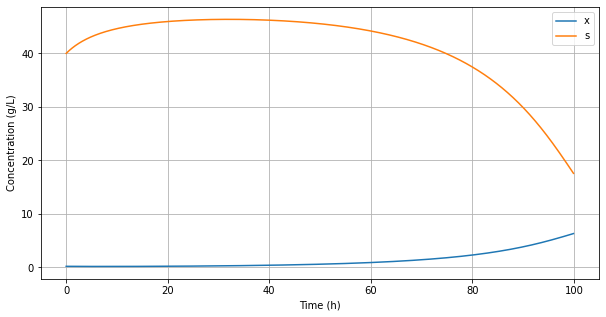

In [13]:
fn.plot_data_fb(predicted)

In [14]:
u = np.arange(0, 3, 0.1)
fitness_values = [fn.fitness_function_fb(u_val, x0, 0, tf, dt, mu_max, yxs, ks, ypx, ki, sf) for u_val in u]

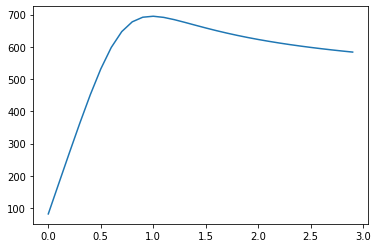

In [15]:
plt.plot(u, fitness_values)

In [16]:
def fitness_function_wrapper(u):

    return -fn.fitness_function_fb(u[0], x0, 0, tf, dt, mu_max, yxs, ks, ypx, ki, sf)

In [17]:
# Configuramos algoritmo genetico
algorithm_param = {'max_num_iteration': 20,
                   'population_size':10,
                   'mutation_probability':0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.8,
                   'parents_portion': 0.3,
                   'elistism':True,
                   'crossover_type':'uniform',
                   'max_iteration_without_improv':None}

In [18]:
# Establecer los rangos de busqueda para las variables de decision
varbound=np.array([
    [0, 3],
])

In [19]:
# LLamar el algortimo genetico para realizar la optimizacion
model=ga(function=fitness_function_wrapper,
         dimension=1,
         variable_type='real',
         variable_boundaries=varbound,
         algorithm_parameters=algorithm_param)

 The best solution found:
 [0.94898494]

 Objective function:
 -694.2215319560838


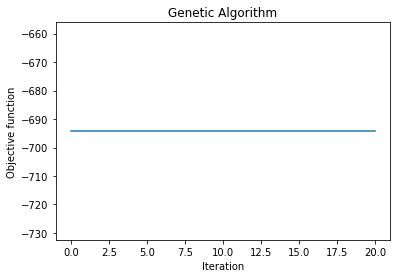

In [20]:
# Realizar la busqueda
start_time = clock()
model.run()
end_time = clock()

In [21]:
total_time = end_time - start_time 
print(f"Total time: {total_time:.3f}s")

Total time: 4.206s


In [22]:
model.best_function

-694.2215319560838

In [23]:
model.best_variable

array([0.94898494])

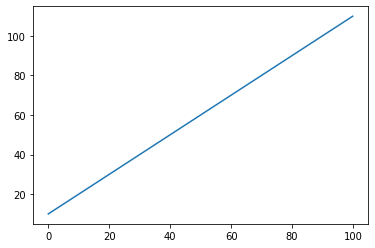

In [24]:
plt.plot(time, V)
plt.show()

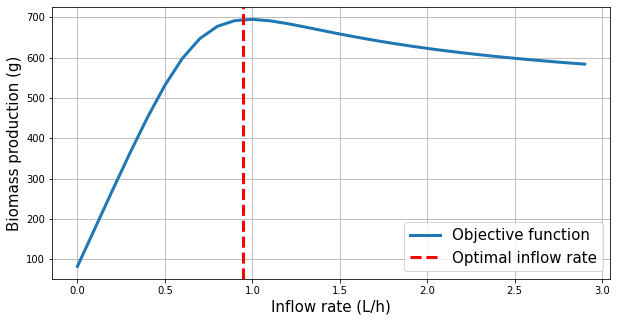

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data
ax.plot(u, fitness_values, lw = 3, label = "Objective function")
ax.axvline(x=model.best_variable, color='r', linestyle='--', lw=3, label = "Optimal inflow rate")
plt.xlabel("Inflow rate (L/h)", size = 15)
plt.ylabel("Biomass production (g)", size = 15)
plt.grid()
plt.legend(fontsize=15)
plt.show()